In [2]:
import numpy as np 
import pandas as pd 
np.random.seed(42)
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Course%20Material-%20Bank%20Marketing/processed_bank.csv",index_col=0)

In [6]:
df.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_before
34579,-0.68711,-2.555677e-13,0.976408,-0.758550,-0.928102,-1.122929,-0.900202,-0.418322,0,1,...,0,0,0,1,0,0,1,0,0,0
446,-0.68711,-2.555677e-13,-0.452557,0.924213,0.806766,0.705671,0.998971,0.637509,1,0,...,0,0,0,0,1,0,0,1,0,0
20173,-0.13552,-2.555677e-13,-0.452557,1.098292,-0.059880,0.761649,1.056089,1.063747,1,1,...,0,0,1,0,0,0,0,1,0,0
18171,-0.13552,-2.555677e-13,-0.452557,1.098292,0.687012,-0.469858,1.055031,1.063747,1,1,...,0,0,0,0,0,1,0,1,0,0
30128,-0.68711,-2.555677e-13,-0.452557,-0.758550,-0.641321,-1.290862,-0.847844,-0.418322,0,0,...,0,0,0,1,0,0,0,1,0,0


In [8]:
df.shape

(9280, 65)

In [9]:
# X is everything that is not y
X = df.loc[:, df.columns != 'y'].values
# y is y
y = df['y'].values

In [11]:
# First split in train / test_dev
from sklearn.model_selection import train_test_split
X_train, X_test_dev, y_train, y_test_dev = train_test_split(X, y, test_size=0.25, random_state=0)

# Second split in dev / test
X_dev, X_test, y_dev, y_test = train_test_split(X_test_dev, y_test_dev, test_size=0.5, random_state=0)

# Remove test_dev set from memory
del X_test_dev
del y_test_dev

In [12]:
# Get Keras
# We will build a simple sequential model
from keras.models import Sequential
# Using fully connected layers
from keras.layers import Dense
# With vanilla gradient descent
from keras.optimizers import SGD

In [13]:
# Sequential model
model = Sequential()

# Logistic regresison is a single layer network
model.add(Dense(1,activation='sigmoid',input_dim=64))

# Compile the model
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics=['acc'])

In [14]:
history_log = model.fit(X_train, y_train, epochs=1000, batch_size=X_train.shape[0], verbose=0)

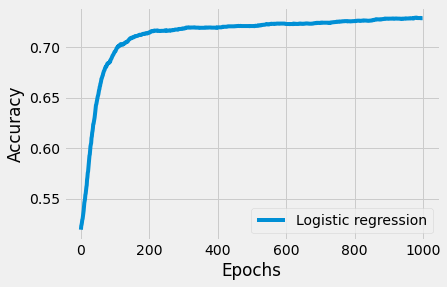

In [15]:
plt.style.use('fivethirtyeight')
plt.plot(history_log.history['acc'], label = 'Logistic regression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

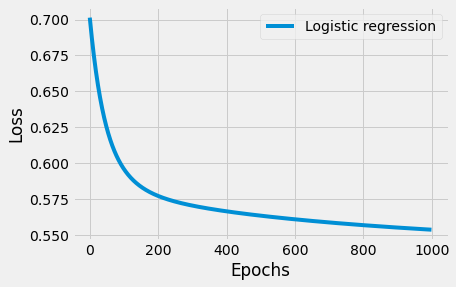

In [16]:
plt.plot(history_log.history['loss'], label='Logistic regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(x=X_dev,y=y_dev)

37/37 [==============================] - 0s 632us/step - loss: 0.5601 - acc: 0.7267


[0.5600904226303101, 0.7267241477966309]

In [18]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(32,activation='tanh',input_dim=64))

# Second hidden layer
model.add(Dense(16,activation='tanh'))

# Output layer
model.add(Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['acc'])


# Train
history_tanh = model.fit(X_train, y_train, # Train on training set
                         epochs=1000, # We will train over 1,000 epochs
                         batch_size=X_train.shape[0], # Batch size = training set size
                         verbose=0) # Suppress Keras output

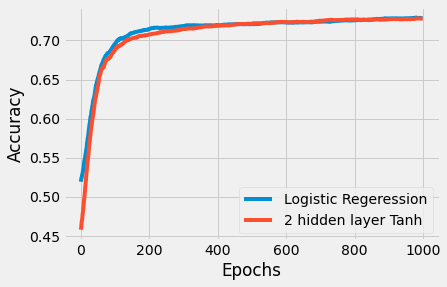

In [19]:
plt.plot(history_log.history['acc'], label= 'Logistic Regeression')
plt.plot(history_tanh.history['acc'], label= '2 hidden layer Tanh')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

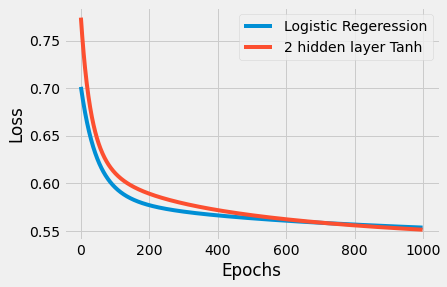

In [20]:
plt.plot(history_log.history['loss'], label= 'Logistic Regeression')
plt.plot(history_tanh.history['loss'], label= '2 hidden layer Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(x=X_dev,y=y_dev)

37/37 [==============================] - 0s 656us/step - loss: 0.5633 - acc: 0.7198


[0.5632534027099609, 0.7198275923728943]

In [22]:
# Sequential model
model = Sequential()

# First hidden layer now with relu!
model.add(Dense(32,activation='relu',input_dim=64))

# Second hidden layer now with relu!
model.add(Dense(16,activation='relu'))

# Output layer stayed sigmoid
model.add(Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train
history_relu = model.fit(X_train, y_train, # Train on training set
                         epochs=1000, # We will train over 1,000 epochs
                         batch_size=X_train.shape[0], # Batch size = training set size
                         verbose=0) # Suppress Keras output

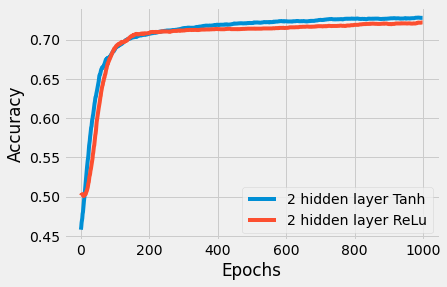

In [23]:
plt.plot(history_tanh.history['acc'], label='2 hidden layer Tanh')
plt.plot(history_relu.history['acc'], label='2 hidden layer ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

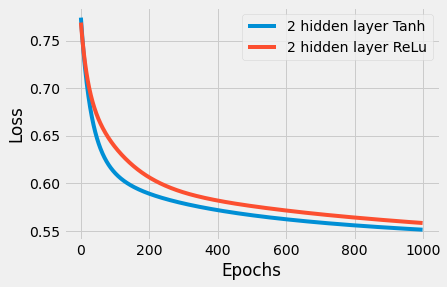

In [24]:
plt.plot(history_tanh.history['loss'], label='2 hidden layer Tanh')
plt.plot(history_relu.history['loss'], label='2 hidden layer ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

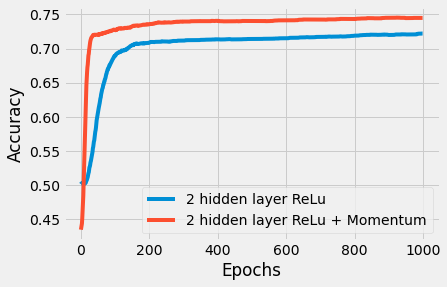

In [25]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(32,activation='relu',input_dim=64))

# Second hidden layer
model.add(Dense(16,activation='relu'))

# Output layer
model.add(Dense(1,activation='sigmoid'))

# Setup optimizer with learning rate of 0.01 and momentum (beta) of 0.9
momentum_optimizer = SGD(lr=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=momentum_optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

# Train
history_momentum = model.fit(X_train, y_train, # Train on training set
                             epochs=1000, # We will train over 1,000 epochs
                             batch_size=X_train.shape[0], # Batch size = training set size
                             verbose=0) # Suppress Keras output
plt.plot(history_relu.history['acc'], label= '2 hidden layer ReLu')
plt.plot(history_momentum.history['acc'], label= '2 hidden layer ReLu + Momentum')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

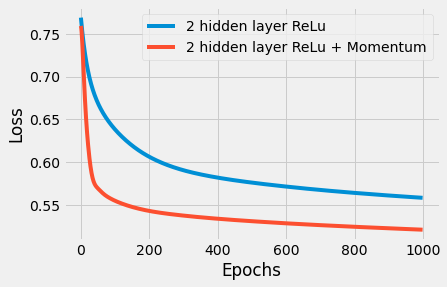

In [26]:
plt.plot(history_relu.history['loss'], label= '2 hidden layer ReLu')
plt.plot(history_momentum.history['loss'], label= '2 hidden layer ReLu + Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model.evaluate(x=X_dev,y=y_dev)

37/37 [==============================] - 0s 707us/step - loss: 0.5430 - acc: 0.7310


[0.5429969429969788, 0.7310344576835632]